In [81]:
print('Prever o total de vendas')

In [ ]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from datetime import date
from sklearn.metrics import r2_score, mean_squared_error

In [82]:
# Define functions 

def load_data(path):
    '''
    carregar dados
    '''
    
    df = pd.read_csv(path, sep = ';')
    print('Data loaded successfully')
    
    return df

def visualize_df_data(df):   
    '''
    visualizar tipo de dados
    '''

    print("preview dos dados")
    print(df.head(5))
    print("tipo dos dados")
    print(df.info())

def get_processed_df(df, columns_to_drop):
    '''
    remover colunas não utilizadas na analise
    '''
    
    df_processed = df.drop(columns_to_drop, axis=1) #drop colunas desnecessarias
    
    return df_processed

def get_df_stats(df):
    '''
    monstrar caracteristicas dos dados
    '''

    print("colunas utilizadas")
    print(df.info())

    print("caracteristica das variaveis")
    df.select_dtypes('number').describe().transpose() #caracteristica das variaveis numericas

    print("visulizar colunas com valores faltantes")
    print(df.isna().sum()) #Income com valores faltantes
    
def get_hist_plot(df, colunm_name):
    '''
    plotar histograma
    '''
    sns.set(font_scale=0.6)
    for i in range(len(colunm_name)):
        plt.subplot(int(np.ceil(len(colunm_name)/2)), 2, i+1)
        sns.histplot(x = df[colunm_name[i]])
    plt.show()

def get_box_plot(df, colunm_name):
    '''
    plotar boxplot
    '''
    sns.set(font_scale=0.6)
    for i in range(len(colunm_name)):
        plt.subplot(int(np.ceil(len(colunm_name)/2)), 2, i+1)
        sns.boxplot(y = df[colunm_name[i]])
    plt.show()

def get_scale_df(df):
    '''
    normatização das colunas
    '''
    min_max_scaler = MinMaxScaler()
    df[df.columns] = min_max_scaler.fit_transform(df)
    print(df.head(5))
        
    return df

def get_teste_train(df, col, split_test_size):
    '''
    separar dataset de teste e treino
    '''
    features = df.columns.drop(col)
    target = [col]

    X = df[features].values
    y = df[target].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state=8)

    print('Variáveis explicativas de treino:', X_train.shape)
    print('Variáveis explicativas de teste:', X_test.shape)
    print('Variável alvo de treino:', y_train.shape)
    print('Variável alvo de teste:', y_test.shape)

    fscaler = MinMaxScaler()
    X_train = fscaler.fit_transform(X_train)
    X_test = fscaler.transform(X_test)
    return X_train, X_test, y_train, y_test

def get_model(model, X_train, y_train, X_test, y_test):
    '''
    usar modelo de classificação e calcular metricas
    '''
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print('mean square error: ', mean_squared_error(y_test, predictions, squared=False)) #0+ (lower is better)
    print('mean r2 score: ', r2_score(y_test, predictions)) #0-1 (larger is better)
    plt.subplot(1, 2, 1)
    sns.regplot(x=y_test, y=predictions)

In [83]:
path = 'https://github.com/knmukai/retail-customer-segmentation-analysis/blob/main/marketing_campaign.csv?raw=true'
df = load_data(path)

Data loaded successfully


In [84]:
visualize_df_data(df)

preview dos dados
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain 

In [85]:
columns_to_drop = ['ID', 'Dt_Customer', 'Recency', 'Complain', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Z_CostContact', 'NumDealsPurchases','NumWebPurchases', 'Z_Revenue',
'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

df_processed = get_processed_df(df, columns_to_drop)

In [86]:
get_df_stats(df_processed)

colunas utilizadas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year_Birth        2240 non-null   int64  
 1   Education         2240 non-null   object 
 2   Marital_Status    2240 non-null   object 
 3   Income            2216 non-null   float64
 4   Kidhome           2240 non-null   int64  
 5   Teenhome          2240 non-null   int64  
 6   MntWines          2240 non-null   int64  
 7   MntFruits         2240 non-null   int64  
 8   MntMeatProducts   2240 non-null   int64  
 9   MntFishProducts   2240 non-null   int64  
 10  MntSweetProducts  2240 non-null   int64  
 11  MntGoldProds      2240 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 210.1+ KB
None
caracteristica das variaveis
visulizar colunas com valores faltantes
Year_Birth           0
Education            0
Marital_Status       0
Income   

In [87]:
print("substituir status marital Alone, Absurd e YOLO por Single e Widow por Divorced")
df_processed['Marital_Status'].replace(['Alone','Absurd','YOLO'], 'Single', inplace=True)
df_processed['Marital_Status'].replace(['Widow'], 'Divorced', inplace=True)
print(df_processed['Marital_Status'].value_counts())

substituir status marital Alone, Absurd e YOLO por Single e Widow por Divorced
Married     864
Together    580
Single      487
Divorced    309
Name: Marital_Status, dtype: int64


In [88]:
print('sinalizar apenas se possui ou não filhos')
df_processed['Childhome'] = np.where((df_processed['Kidhome'] == 0) | (df_processed['Teenhome'] == 0), 0, 1)
df_processed = df_processed.drop(['Kidhome', 'Teenhome'], axis=1) #drop colunas de filhos
print(df_processed['Childhome'].value_counts())

sinalizar apenas se possui ou não filhos
0    1813
1     427
Name: Childhome, dtype: int64


In [89]:
print("media da renda por nivel de educacao")
df_processed['Income'].fillna(df_processed.groupby('Education')['Income'].transform('mean'), inplace = True) #substituir valores na pela media por Education

media da renda por nivel de educacao


In [90]:
# remoção de outliers
print("qtd de registros antes da remocao de outliers:"+str(len(df_processed)))
df_processed = df_processed[(df_processed['Year_Birth']>=1940) & (df_processed['Income']<=100000)].reset_index()
print("qtd de registros antes da remocao de outliers:"+str(len(df_processed)))

qtd de registros antes da remocao de outliers:2240
qtd de registros antes da remocao de outliers:2224


visualizar distribuição das vendas por tipo


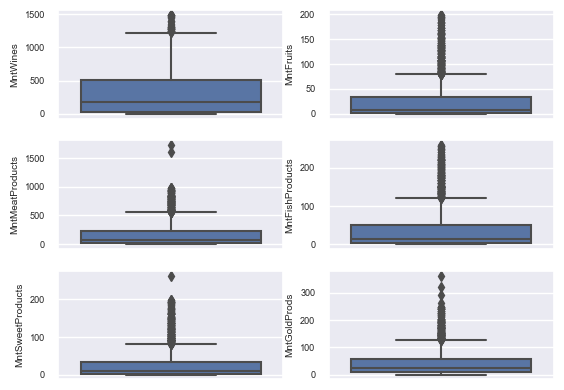

In [91]:
print('visualizar distribuição das vendas por tipo')
cols=['MntWines', 'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
get_box_plot(df_processed, cols)

In [92]:
print('criar coluna com o total gasto por cada cliente em produtos')
df_processed.insert(12,'MntTotal',df_processed['MntWines']+df_processed['MntFruits']+df_processed['MntMeatProducts']+df_processed['MntFishProducts']+df_processed['MntSweetProducts']
+df_processed['MntGoldProds'])
df_processed = df_processed.drop(['MntWines', 'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'], axis=1) 

criar coluna com o total gasto por cada cliente em produtos


In [93]:
print('tranformar ano de nascimento em idade')
df_processed.insert(6,'age', date.today().year-df_processed['Year_Birth'])
df_processed = df_processed.drop(['Year_Birth'], axis=1) 
df_processed = df_processed.drop(['index'], axis=1)  #remove index

tranformar ano de nascimento em idade


In [94]:
print('tranformar variaveis categoricas em dummies')
df_dummies = pd.get_dummies(data=df_processed, drop_first=True)
print(df_dummies.head(5))

tranformar variaveis categoricas em dummies
    Income  Childhome  age  MntTotal  Education_Basic  Education_Graduation  \
0  58138.0          0   65      1617                0                     1   
1  46344.0          1   68        27                0                     1   
2  71613.0          0   57       776                0                     1   
3  26646.0          0   38        53                0                     1   
4  58293.0          0   41       422                0                     0   

   Education_Master  Education_PhD  Marital_Status_Married  \
0                 0              0                       0   
1                 0              0                       0   
2                 0              0                       0   
3                 0              0                       0   
4                 0              1                       1   

   Marital_Status_Single  Marital_Status_Together  
0                      1                        0  
1   

mapa de calor com a correlação entre variaveis


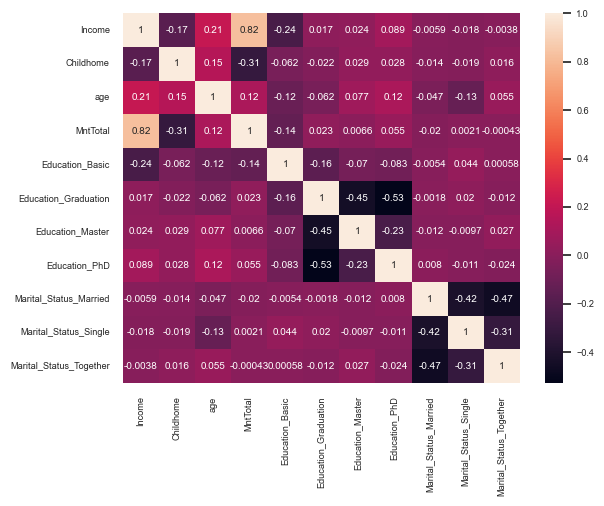

In [95]:
print('mapa de calor com a correlação entre variaveis')
plt.figure()
sns.heatmap(df_dummies.corr(), annot=True)
plt.show()

In [96]:
target_col = 'MntTotal'
test_size = 0.1

X_train, X_test, y_train, y_test = get_teste_train(df_dummies, target_col, test_size)

Variáveis explicativas de treino: (2001, 10)
Variáveis explicativas de teste: (223, 10)
Variável alvo de treino: (2001, 1)
Variável alvo de teste: (223, 1)


decision tree regressor
mean square error:  401.08353803703403
mean r2 score:  0.5390409215942198


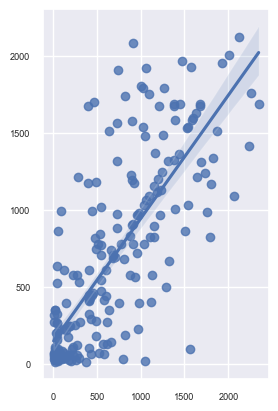

In [97]:
print('decision tree regressor')
dtr = DecisionTreeRegressor()

get_model(dtr, X_train, y_train, X_test, y_test)

Linear Regression
mean square error:  322.0559459087044
mean r2 score:  0.7027955269771814


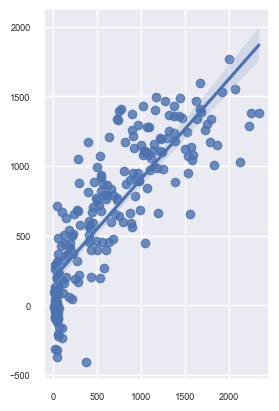

In [98]:
print('Linear Regression')
lr = LinearRegression()

get_model(lr, X_train, y_train, X_test, y_test)

In [99]:
print('Linear Regression apresenta um melhor score')

Linear Regression apresenta um melhor score
